# Libraries

In [50]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import time
import threading
import matplotlib.pyplot as plt


# URL and Respnse

In [52]:
url = 'https://www.imdb.com/search/title/?title_type=tv_series&release_date=2020-01-01,2021-12-31&countries=US'
# Headers = {
#     'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.',
#     'Accept-Language': 'en-US,en;q=0.5'
# }
response = requests.get(url)

#response = requests.get(url, headers=Headers)
print(response.status_code)
soup = BeautifulSoup(response.text, 'html.parser')

#expected response code is 403 to solve this problem we need to add headers

403


In [53]:
url = 'https://www.imdb.com/search/title/?title_type=tv_series&release_date=2020-01-01,2021-12-31&countries=US'
Headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.',
    'Accept-Language': 'en-US,en;q=0.5'
}

response = requests.get(url, headers=Headers)
print(response.status_code)
soup = BeautifulSoup(response.text, 'html.parser')

200


# html Cleaning --> finding li and links of movies

In [54]:
html1 = soup.find('li', attrs={ 'class' : 'ipc-metadata-list-summary-item'})
html2 = html1.find('a', attrs={ 'class' : 'ipc-lockup-overlay ipc-focusable'})
htmls = soup.find_all('li', attrs={ 'class' : 'ipc-metadata-list-summary-item'})
htmls2 = soup.find_all('a', attrs={ 'class' : 'ipc-lockup-overlay ipc-focusable'})
#htmls2

In [55]:
#htmls2

# finding the second part of urls

In [56]:
incomplete_links=[]
for htm in htmls2:
    #print(htm.get('href'))
    incomplete_links.append(htm.get('href'))
#print(len(incomplete_links))
#50

In [57]:
#incomplete_links[3]

# finding full urls

In [58]:
urls=[]
for link in incomplete_links:
    url='https://www.imdb.com'+link
    #print(url)
    urls.append(url)
#print(len(urls))
#50


In [59]:
#urls[3]

# what to store?

In [60]:
titles = []
links = []
runtimes = []
genres_list = []
parental_guidelines = []
stars_list = []

# GETER FUNCTIONS:

In [61]:
def title_getter(soup):
    movie_name = soup.find('span', attrs={'class' : 'hero__primary-text'}).text
    titles.append(movie_name)
    print(movie_name)

In [62]:
def link_getter(soup):
    links.append(url)
    print(url)

In [63]:
def runtime_getter(soup):
    runtime = soup.find('ul', class_='ipc-inline-list ipc-inline-list--show-dividers sc-d8941411-2 cdJsTz baseAlt')
    runtime1 = runtime.find_next('li',attrs={'class':'ipc-inline-list__item'}).find_next().find_next().find_next().find_next().find_next().text
    runtimes.append(runtime1)
    print(runtime1)

In [64]:
def genres_getter(soup):
    genres = soup.find('div',attrs={'class':'ipc-chip-list__scroller'})
    genres = genres.find_all('a',attrs={'class':'ipc-chip ipc-chip--on-baseAlt'})
    movie_genre = [genre.find('span', attrs={'class':'ipc-chip__text'}).text for genre in genres]
    genres_list.append(movie_genre)
    print(movie_genre)

In [65]:
def parentalguide_getter(soup):
    parental_guide=soup.find('ul',attrs={'class','ipc-inline-list ipc-inline-list--show-dividers sc-d8941411-2 cdJsTz baseAlt'})
    parental_guide=parental_guide.find_all('a')[-1].text
    parental_guidelines.append(parental_guide)
    print(parental_guide)

In [66]:
def stars_getter(soup):
    stars = soup.find('ul',attrs={'class':'ipc-inline-list ipc-inline-list--show-dividers ipc-inline-list--inline ipc-metadata-list-item__list-content baseAlt'})
    stars = stars.find_all('li')
    star_names = [star.find('a').text for star in stars]
    stars_list.append(star_names)
    print(star_names)

# new body block

# without threading

In [67]:
start_time1 = time.time()

for url in urls:
        
    response = requests.get(url, headers=Headers)
    soup = BeautifulSoup(response.text, 'html.parser')
    print('**'*20)
    title_getter(soup)
    link_getter(soup)
    runtime_getter(soup)
    genres_getter(soup)
    parentalguide_getter(soup)
    stars_getter(soup)
    print('********************************************************')
    
end_time1 = time.time()


df1 = pd.DataFrame({
    'Title': titles,
    'Link': links,
    'Runtime': runtimes,
    'Genres': genres_list,
    'Parental Guidelines': parental_guidelines,
    'Stars': stars_list
})
df1

****************************************
What If...?
https://www.imdb.com/title/tt10168312/?ref_=sr_i_1
32m
['Animation', 'Action', 'Adventure']
TV-14
['Jeffrey Wright', 'Terri Douglas', 'Matthew Wood']
********************************************************
****************************************
Ted Lasso
https://www.imdb.com/title/tt10986410/?ref_=sr_i_2
24h 13m
['Comedy', 'Drama', 'Sport']
TV-MA
['Brendan Hunt', 'Joe Kelly', 'Bill Lawrence']
********************************************************
****************************************
Only Murders in the Building
https://www.imdb.com/title/tt11691774/?ref_=sr_i_3
30m
['Comedy', 'Crime', 'Drama']
TV-MA
['John Hoffman', 'Steve Martin']
********************************************************
****************************************
The White Lotus
https://www.imdb.com/title/tt13406094/?ref_=sr_i_4
1h
['Comedy', 'Drama']
TV-MA
['Mike White']
********************************************************
********************************

,Title,Link,Runtime,Genres,Parental Guidelines,Stars
0,What If...?,https://www.imdb.com/title/tt10168312/?ref_=sr...,32m,"[Animation, Action, Adventure]",TV-14,"[Jeffrey Wright, Terri Douglas, Matthew Wood]"
1,Ted Lasso,https://www.imdb.com/title/tt10986410/?ref_=sr...,24h 13m,"[Comedy, Drama, Sport]",TV-MA,"[Brendan Hunt, Joe Kelly, Bill Lawrence]"
2,Only Murders in the Building,https://www.imdb.com/title/tt11691774/?ref_=sr...,30m,"[Comedy, Crime, Drama]",TV-MA,"[John Hoffman, Steve Martin]"
3,The White Lotus,https://www.imdb.com/title/tt13406094/?ref_=sr...,1h,"[Comedy, Drama]",TV-MA,[Mike White]
4,Dr. Death,https://www.imdb.com/title/tt9179552/?ref_=sr_i_5,6h 43m,"[Crime, Drama, Thriller]",TV-MA,"[Ashley Michel Hoban, Patrick Macmanus]"
5,Invincible,https://www.imdb.com/title/tt6741278/?ref_=sr_i_6,50m,"[Animation, Action, Adventure]",TV-MA,"[Robert Kirkman, Ryan Ottley, Cory Walker]"
6,Yellowjackets,https://www.imdb.com/title/tt11041332/?ref_=sr...,1h,"[Drama, Horror, Mystery]",TV-MA,"[Ashley Lyle, Bart Nickerson]"
7,The Wheel of Time,https://www.imdb.com/title/tt7462410/?ref_=sr_i_8,1h,"[Action, Adventure, Drama]",TV-14,[Rafe Judkins]
8,La Brea,https://www.imdb.com/title/tt11640018/?ref_=sr...,IMDb RATING5.8/1015KYOUR RATINGRatePOPULARITY1...,"[Drama, Mystery, Sci-Fi]",TV-14,[David Appelbaum]
9,Loki,https://www.imdb.com/title/tt9140554/?ref_=sr_...,9h 46m,"[Action, Adventure, Fantasy]",TV-14,[Michael Waldron]


In [68]:
print(f"Total runtime is {end_time1 - start_time1} seconds.")
runtimeWithoutThread=end_time1 - start_time1

Total runtime is 108.42586994171143 seconds.


In [69]:
df1

,Title,Link,Runtime,Genres,Parental Guidelines,Stars
0,What If...?,https://www.imdb.com/title/tt10168312/?ref_=sr...,32m,"[Animation, Action, Adventure]",TV-14,"[Jeffrey Wright, Terri Douglas, Matthew Wood]"
1,Ted Lasso,https://www.imdb.com/title/tt10986410/?ref_=sr...,24h 13m,"[Comedy, Drama, Sport]",TV-MA,"[Brendan Hunt, Joe Kelly, Bill Lawrence]"
2,Only Murders in the Building,https://www.imdb.com/title/tt11691774/?ref_=sr...,30m,"[Comedy, Crime, Drama]",TV-MA,"[John Hoffman, Steve Martin]"
3,The White Lotus,https://www.imdb.com/title/tt13406094/?ref_=sr...,1h,"[Comedy, Drama]",TV-MA,[Mike White]
4,Dr. Death,https://www.imdb.com/title/tt9179552/?ref_=sr_i_5,6h 43m,"[Crime, Drama, Thriller]",TV-MA,"[Ashley Michel Hoban, Patrick Macmanus]"
5,Invincible,https://www.imdb.com/title/tt6741278/?ref_=sr_i_6,50m,"[Animation, Action, Adventure]",TV-MA,"[Robert Kirkman, Ryan Ottley, Cory Walker]"
6,Yellowjackets,https://www.imdb.com/title/tt11041332/?ref_=sr...,1h,"[Drama, Horror, Mystery]",TV-MA,"[Ashley Lyle, Bart Nickerson]"
7,The Wheel of Time,https://www.imdb.com/title/tt7462410/?ref_=sr_i_8,1h,"[Action, Adventure, Drama]",TV-14,[Rafe Judkins]
8,La Brea,https://www.imdb.com/title/tt11640018/?ref_=sr...,IMDb RATING5.8/1015KYOUR RATINGRatePOPULARITY1...,"[Drama, Mystery, Sci-Fi]",TV-14,[David Appelbaum]
9,Loki,https://www.imdb.com/title/tt9140554/?ref_=sr_...,9h 46m,"[Action, Adventure, Fantasy]",TV-14,[Michael Waldron]


# Using threading:


# body block 

In [47]:
def scrape_url(url):
    response = requests.get(url, headers=Headers)
    soup = BeautifulSoup(response.text, 'html.parser')
    print('**'*20)
    title_getter(soup)
    link_getter(soup)
    runtime_getter(soup)
    genres_getter(soup)
    parentalguide_getter(soup)
    stars_getter(soup)
    print('********************************************************')

start_time = time.time()

# Create a thread for each URL
threads = [threading.Thread(target=scrape_url, args=(url,)) for url in urls]

# Start all threads
for thread in threads:
    thread.start()

# Wait for all threads to finish
for thread in threads:
    thread.join()

end_time = time.time()

print(f"Total runtime is {end_time - start_time} seconds.")

df2 = pd.DataFrame({
    'Title': titles,
    'Link': links,
    'Runtime': runtimes,
    'Genres': genres_list,
    'Parental Guidelines': parental_guidelines,
    'Stars': stars_list
})

df2

****************************************
Reservation Dogs
https://www.imdb.com/title/tt11006642/?ref_=sr_i_50
30m
['Comedy', 'Crime']
TV-MA
['Sterlin Harjo', 'Taika Waititi']
********************************************************
****************************************
Sex/Life
https://www.imdb.com/title/tt11006642/?ref_=sr_i_50
45m
['Comedy', 'Drama', 'Romance']
TV-MA
['Stacy Rukeyser']
********************************************************
****************************************
The Sex Lives of College Girls
https://www.imdb.com/title/tt11006642/?ref_=sr_i_50
27m
['Comedy']
TV-MA
['Mindy Kaling', 'Justin Noble']
********************************************************
****************************************
Foundation
https://www.imdb.com/title/tt11006642/?ref_=sr_i_50
1h
['Drama', 'Sci-Fi']
TV-14
['Josh Friedman', 'David S. Goyer']
********************************************************
****************************************
The White Lotus
https://www.imdb.com/title/tt11

,Title,Link,Runtime,Genres,Parental Guidelines,Stars
0,Reservation Dogs,https://www.imdb.com/title/tt11006642/?ref_=sr...,30m,"[Comedy, Crime]",TV-MA,"[Sterlin Harjo, Taika Waititi]"
1,Sex/Life,https://www.imdb.com/title/tt11006642/?ref_=sr...,45m,"[Comedy, Drama, Romance]",TV-MA,[Stacy Rukeyser]
2,The Sex Lives of College Girls,https://www.imdb.com/title/tt11006642/?ref_=sr...,27m,[Comedy],TV-MA,"[Mindy Kaling, Justin Noble]"
3,Foundation,https://www.imdb.com/title/tt11006642/?ref_=sr...,1h,"[Drama, Sci-Fi]",TV-14,"[Josh Friedman, David S. Goyer]"
4,The White Lotus,https://www.imdb.com/title/tt11006642/?ref_=sr...,1h,"[Comedy, Drama]",TV-MA,[Mike White]
5,Star Trek: Picard,https://www.imdb.com/title/tt11006642/?ref_=sr...,46m,"[Action, Adventure, Drama]",TV-MA,"[Kirsten Beyer, Michael Chabon, Akiva Goldsman]"
6,FBI: International,https://www.imdb.com/title/tt11006642/?ref_=sr...,43m,"[Action, Adventure, Crime]",TV-14,"[Dick Wolf, Derek Haas]"
7,The Madame Blanc Mysteries,https://www.imdb.com/title/tt11006642/?ref_=sr...,1h,[Drama],TV-14,"[Sally Lindsay, Sue Vincent]"
8,The Outsider,https://www.imdb.com/title/tt11006642/?ref_=sr...,1h,"[Crime, Drama, Horror]",TV-MA,[Richard Price]
9,Never Have I Ever,https://www.imdb.com/title/tt11006642/?ref_=sr...,30m,"[Comedy, Drama]",TV-14,"[Lang Fisher, Mindy Kaling]"


In [48]:
print(f"Total runtime is {end_time - start_time} seconds.")
runtimeThread=end_time - start_time

Total runtime is 18.475740909576416 seconds.


In [49]:
df2.head(52)

,Title,Link,Runtime,Genres,Parental Guidelines,Stars
0,Reservation Dogs,https://www.imdb.com/title/tt11006642/?ref_=sr...,30m,"[Comedy, Crime]",TV-MA,"[Sterlin Harjo, Taika Waititi]"
1,Sex/Life,https://www.imdb.com/title/tt11006642/?ref_=sr...,45m,"[Comedy, Drama, Romance]",TV-MA,[Stacy Rukeyser]
2,The Sex Lives of College Girls,https://www.imdb.com/title/tt11006642/?ref_=sr...,27m,[Comedy],TV-MA,"[Mindy Kaling, Justin Noble]"
3,Foundation,https://www.imdb.com/title/tt11006642/?ref_=sr...,1h,"[Drama, Sci-Fi]",TV-14,"[Josh Friedman, David S. Goyer]"
4,The White Lotus,https://www.imdb.com/title/tt11006642/?ref_=sr...,1h,"[Comedy, Drama]",TV-MA,[Mike White]
5,Star Trek: Picard,https://www.imdb.com/title/tt11006642/?ref_=sr...,46m,"[Action, Adventure, Drama]",TV-MA,"[Kirsten Beyer, Michael Chabon, Akiva Goldsman]"
6,FBI: International,https://www.imdb.com/title/tt11006642/?ref_=sr...,43m,"[Action, Adventure, Crime]",TV-14,"[Dick Wolf, Derek Haas]"
7,The Madame Blanc Mysteries,https://www.imdb.com/title/tt11006642/?ref_=sr...,1h,[Drama],TV-14,"[Sally Lindsay, Sue Vincent]"
8,The Outsider,https://www.imdb.com/title/tt11006642/?ref_=sr...,1h,"[Crime, Drama, Horror]",TV-MA,[Richard Price]
9,Never Have I Ever,https://www.imdb.com/title/tt11006642/?ref_=sr...,30m,"[Comedy, Drama]",TV-14,"[Lang Fisher, Mindy Kaling]"


# Results

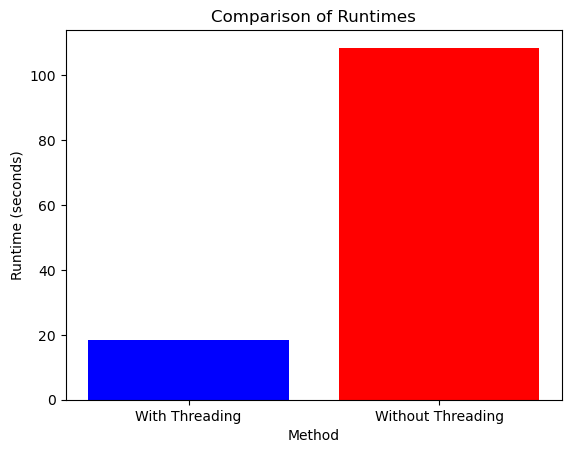

In [71]:

runtimes = [runtimeThread, runtimeWithoutThread]

labels = ['With Threading', 'Without Threading']

plt.bar(labels, runtimes, color=['blue', 'red'])

plt.title('Comparison of Runtimes')
plt.xlabel('Method')
plt.ylabel('Runtime (seconds)')

plt.show()
